In [67]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [66]:
# Load dataset
df = pd.read_csv(r"C:\Users\turbe\OneDrive\Documents\NFL_Playoff_Seeding - Sheet1.csv")
df

,season,conference,seed,team
0,2002,AFC,1,Raiders
1,2002,AFC,2,Titans
2,2002,AFC,3,Steelers
3,2002,AFC,4,Jets
4,2002,AFC,5,Colts
...,...,...,...,...
295,2025,NFC,3,Eagles
296,2025,NFC,4,Panthers
297,2025,NFC,5,Rams
298,2025,NFC,6,49ers


In [65]:
# Check data types and structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   season      300 non-null    int64 
 1   conference  300 non-null    object
 2   seed        300 non-null    int64 
 3   team        300 non-null    object
 4   era         300 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 11.8+ KB


In [64]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

season        0
conference    0
seed          0
team          0
era           0
dtype: int64

In [63]:
# Ensure no duplicate teams entries for the same season
duplicates = df.duplicated(subset=['season', 'team']).sum()
print(f"Duplicates Found: {duplicates}")

Duplicates Found: 0


In [62]:
# Validate seed range (Should be 1-7)
print(f"Seed Range: {df.seed.min()} to {df.seed.max()}")

Seed Range: 1 to 7


In [61]:
# Check confrence names (Should be AFC & NFC only)
print(f"Confrences found: {df['conference'].unique()}")

Confrences found: ['AFC' 'NFC']


In [60]:
# List unique team names for naming consistency
print(sorted(df['team'].unique()))

['49ers', 'Bears', 'Bengals', 'Bills', 'Broncos', 'Browns', 'Buccaneers', 'Cardinals', 'Chargers', 'Chiefs', 'Colts', 'Commanders', 'Cowboys', 'Dolphins', 'Eagles', 'Falcons', 'Giants', 'Jaguars', 'Jets', 'Lions', 'Packers', 'Panthers', 'Patriots', 'Raiders', 'Rams', 'Ravens', 'Saints', 'Seahawks', 'Steelers', 'Texans', 'Titans', 'Vikings']


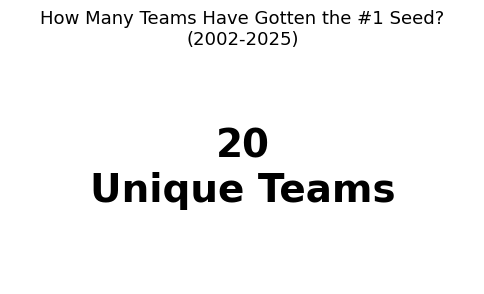

In [59]:
# Calculate unique teams that achieved the #1 seed
unique_one_seed_teams = df[df['seed'] == 1]['team'].nunique()

# Visualise the total count as a big number card
plt.figure(figsize=(6,3))
plt.text(
0.5, 0.5,
f"{unique_one_seed_teams}\nUnique Teams",
ha='center',
va='center',
fontsize=28,
weight='bold'
)

plt.title('How Many Teams Have Gotten the #1 Seed?\n(2002-2025)', fontsize=13)
plt.axis('off')
plt.show()

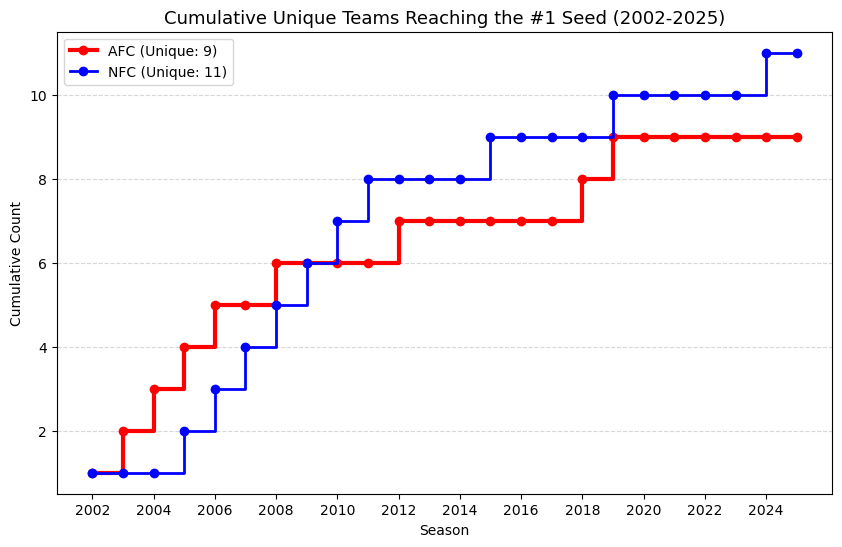

In [58]:
# Filter #1 seeds and mark the first time a team appears as the #1 seed
df_seeds = df[df['seed'] == 1].sort_values('season')
df_seeds['is_new_team'] = ~df_seeds['team'].duplicated()

# Track the cumulative count of unique #1 seeds per conference
df_seeds['unique_conf'] = df_seeds.groupby('conference')['is_new_team'].cumsum()

# Plot the growth unique #1 seeds over time by conference
plt.figure(figsize=(10,6))
colors = {'AFC': 'red', 'NFC': 'blue'}
for conf in ['AFC', 'NFC']:
    subset = df_seeds[df_seeds['conference'] == conf]
    final_count = subset['unique_conf'].iloc[-1]
    line_width = 3 if conf == 'AFC' else 2
    plt.step(subset['season'], subset['unique_conf'], where='post',
            label=f'{conf} (Unique: {int(final_count)})',
            color=colors[conf], linewidth=line_width, marker='o')
    
plt.title('Cumulative Unique Teams Reaching the #1 Seed (2002-2025)', fontsize=13)
plt.xlabel('Season')
plt.ylabel('Cumulative Count')
plt.xticks(range(2002,2025, 2))
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend()
plt.show()

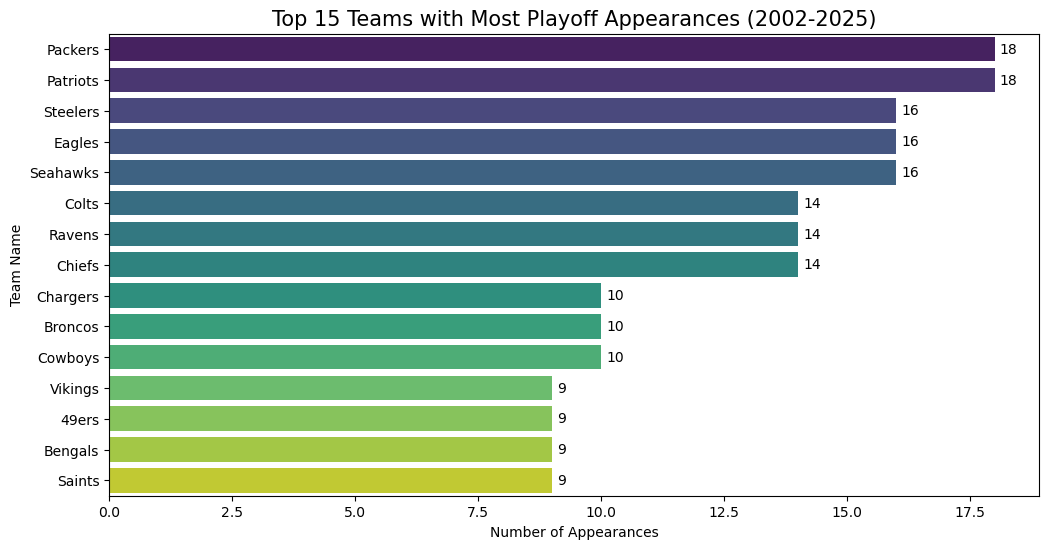

In [57]:
# Count total postseason appearances for the top 15 franchises
team_appearances = df['team'].value_counts().head(15)

# Plot frequency of playoff qualification
plt.figure(figsize=(12,6))
ax = sns.barplot(x=team_appearances.values, y=team_appearances.index, palette='viridis')
for i, v in enumerate(team_appearances.values):
    ax.text(v + 0.1, i, str(v), va='center')
plt.title('Top 15 Teams with Most Playoff Appearances (2002-2025)', fontsize=15)
plt.xlabel('Number of Appearances')
plt.ylabel('Team Name')
plt.show()

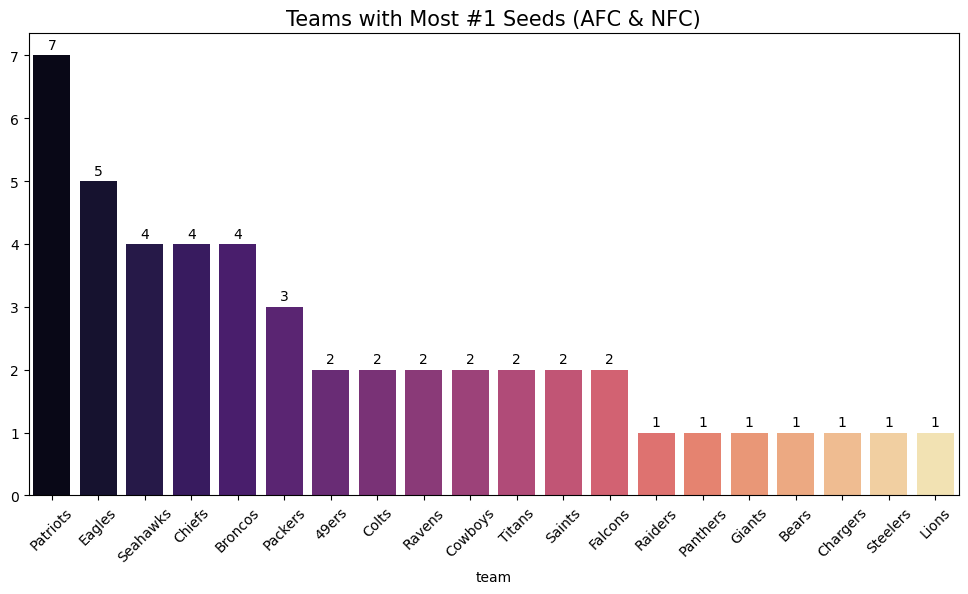

In [56]:
# Filter and count teams that secured the #1 seed
seed_one_teams = df[df['seed'] == 1]['team'].value_counts()

# Visualise regular-season conference leaders
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=seed_one_teams.index, y=seed_one_teams.values, palette='magma')
for i, v in enumerate(seed_one_teams.values):
    ax.text(i, v + 0.1, str(v), ha='center')
plt.title('Teams with Most #1 Seeds (AFC & NFC)', fontsize=15)
plt.xticks(rotation=45)
plt.show()

In [55]:
# Categorise seasons into 5-year buckets (Eras)
df['era'] = (df['season'] // 5) * 5

# Identify teams securing top-two seeds (1 or 2) per era
era_analysis = df[df['seed'] <= 2].groupby(['era', 'team']).size().reset_index(name='top_seed_count')

# Extract top 3 dominant franchises for each 5-year cycle
era_analysis = era_analysis.sort_values(['era', 'top_seed_count'], ascending=[True, False]).groupby('era').head(3)

print("Dominant Teams (Seed 1 or 2) by Era:")
display(era_analysis)

Dominant Teams (Seed 1 or 2) by Era:


,era,team,top_seed_count
2,2000,Eagles,3
4,2000,Patriots,2
0,2000,Buccaneers,1
12,2005,Colts,3
9,2005,Bears,2
11,2005,Chargers,2
30,2010,Patriots,5
26,2010,Broncos,3
24,2010,49ers,2
43,2015,Patriots,4


In [54]:
# Full list of all 32 active NFL franchises
all_nfl_teams = [
    'Raiders', 'Titans', 'Steelers', 'Jets', 'Colts', 'Browns',
    'Eagles', 'Buccaneers', 'Packers', '49ers', 'Giants', 'Falcons',
    'Patriots', 'Chiefs', 'Ravens', 'Broncos', 'Rams', 'Panthers',
    'Seahawks', 'Cowboys', 'Chargers', 'Vikings', 'Bengals', 'Jaguars',
    'Bears', 'Commanders', 'Saints', 'Dolphins', 'Cardinals', 'Texans',
    'Lions', 'Bills'
]

# Identify unique teams present in the historical seeding data
teams_in_dataset = df['team'].unique()

# Identify teams (if any) that never reached a playoff seed in the analysed period
missing_teams = [team for team in all_nfl_teams if team not in teams_in_dataset]

# Final parity audit output
print(f"Teams that never made it to the seeding list (2002-2025):")
if len(missing_teams) == 0:
    print("All teams have appeared at least once!")
else:
    for team in missing_teams:
        print(f"- {team}")

Teams that never made it to the seeding list (2002-2025):
All teams have appeared at least once!


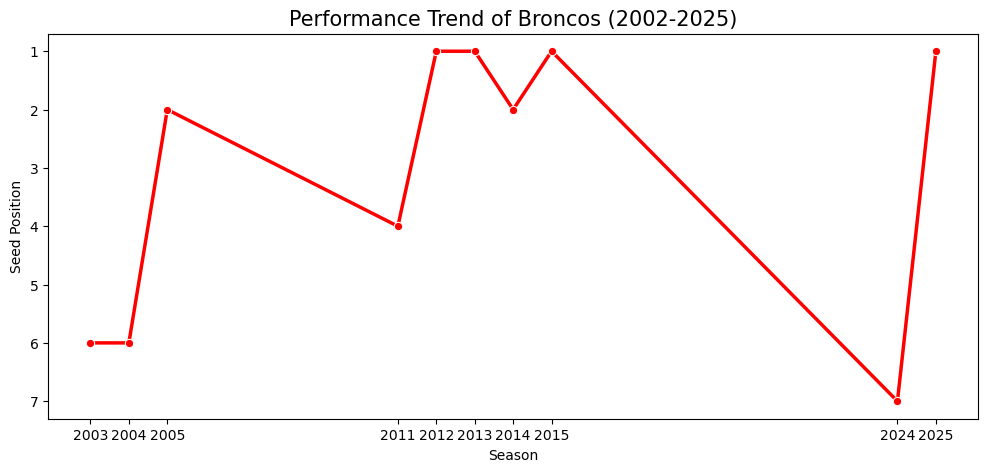

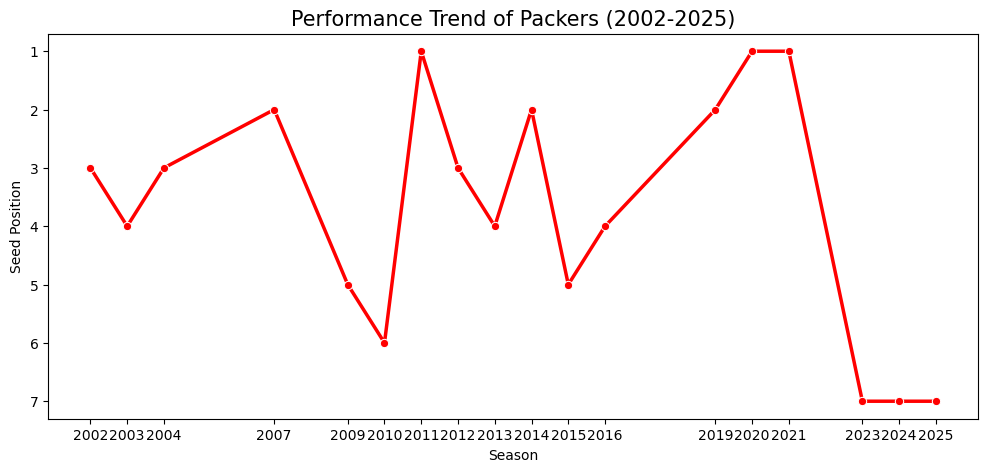

In [53]:
# Filter data for the target franchises
target_team = 'Broncos'
team_data = df[df['team'] == target_team].sort_values('season')

target_team2 = 'Packers'
team_data2 = df[df['team'] == target_team2].sort_values('season')

# Plot the progression of seed positions over time
plt.figure(figsize=(12, 5))
ax = sns.lineplot(data=team_data, x='season', y='seed', marker='o', color='red', linewidth=2.5)
plt.gca().invert_yaxis()
plt.title(f'Performance Trend of {target_team} (2002-2025)', fontsize=15)
plt.ylabel('Seed Position')
plt.xlabel('Season')
plt.xticks(team_data['season'])
plt.show()

plt.figure(figsize=(12, 5))
ax = sns.lineplot(data=team_data2, x='season', y='seed', marker='o', color='red', linewidth=2.5)
plt.gca().invert_yaxis()
plt.title(f'Performance Trend of {target_team2} (2002-2025)', fontsize=15)
plt.ylabel('Seed Position')
plt.xlabel('Season')
plt.xticks(team_data2['season'])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

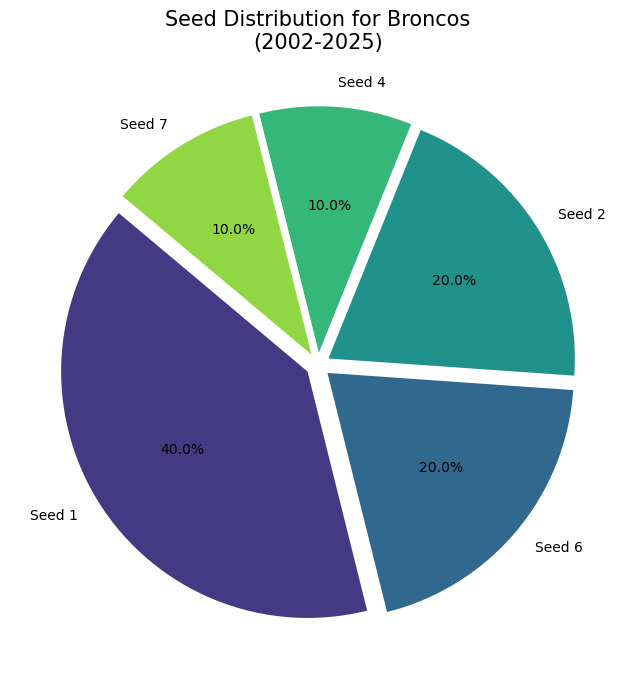

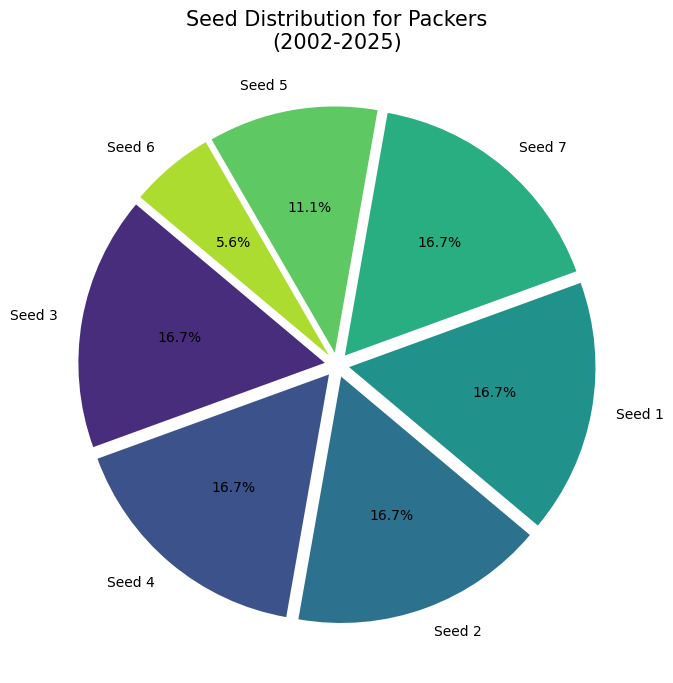

In [52]:
# Calcuate frequency of each seed 
team_seeds = df[df['team'] == target_team]['seed'].value_counts()

team_seeds2 = df[df['team'] == target_team2]['seed'].value_counts()

# Visualise the percentage breakdown of playoff entries
plt.figure(figsize=(8, 8))
plt.pie (
    team_seeds.values,
    labels=[f'Seed {i}' for i in team_seeds.index],
    autopct='%1.1f%%',
    colors=sns.color_palette('viridis', len(team_seeds)),
    startangle=140,
    explode=[0.05] * len(team_seeds)
)

plt.title(f'Seed Distribution for {target_team}\n(2002-2025)', fontsize=15)
plt.show

plt.figure(figsize=(8, 8))
plt.pie (
    team_seeds2.values,
    labels=[f'Seed {i}' for i in team_seeds2.index],
    autopct='%1.1f%%',
    colors=sns.color_palette('viridis', len(team_seeds2)),
    startangle=140,
    explode=[0.05] * len(team_seeds2)
)

plt.title(f'Seed Distribution for {target_team2}\n(2002-2025)', fontsize=15)
plt.show